In [1]:
import sys
print(sys.executable)

/Users/kevinmathew/Desktop/FotStrike AR/fotstrike-ar/backend/.venv/bin/python


In [2]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
print("Model loaded ✅")


Model loaded ✅


In [3]:
frame_path = "../outputs/frames/frame_000010.png"  # change number if needed
print("Using frame:", frame_path)


Using frame: ../outputs/frames/frame_000010.png


In [4]:
results = model(frame_path)
r = results[0]
print("Inference done ✅")


image 1/1 /Users/kevinmathew/Desktop/FotStrike AR/fotstrike-ar/notebooks/../outputs/frames/frame_000010.png: 352x640 5 persons, 11 cars, 2 trucks, 1 sports ball, 46.1ms
Speed: 4.1ms preprocess, 46.1ms inference, 6.4ms postprocess per image at shape (1, 3, 352, 640)
Inference done ✅


In [5]:
names = r.names
boxes = r.boxes

print(f"Total detections: {len(boxes)}")

for b in boxes:
    cls_id = int(b.cls[0])
    cls_name = names[cls_id]
    conf = float(b.conf[0])
    x1, y1, x2, y2 = map(float, b.xyxy[0])
    print(cls_name, round(conf, 3), (round(x1,1), round(y1,1), round(x2,1), round(y2,1)))


Total detections: 19
person 0.907 (2566.2, 525.6, 3201.7, 1236.7)
person 0.903 (455.8, 462.0, 1017.6, 1692.1)
sports ball 0.893 (2369.7, 1059.7, 2457.9, 1169.7)
person 0.886 (5.1, 249.3, 442.9, 1487.6)
person 0.878 (2067.0, 380.7, 2357.3, 1075.9)
person 0.681 (1653.5, 496.1, 1771.9, 809.1)
car 0.663 (262.0, 420.0, 772.0, 618.1)
car 0.62 (1107.5, 345.5, 1447.0, 485.7)
car 0.601 (490.9, 358.4, 921.2, 534.1)
car 0.512 (823.4, 357.0, 1110.0, 521.9)
car 0.511 (2980.2, 439.6, 3251.6, 567.0)
car 0.511 (3091.9, 444.0, 3308.8, 581.5)
car 0.468 (3295.6, 467.3, 3656.6, 633.1)
car 0.454 (3496.9, 469.1, 4096.0, 682.2)
car 0.389 (907.7, 359.4, 1105.0, 511.5)
truck 0.381 (3531.5, 468.8, 4093.6, 687.7)
car 0.353 (3005.6, 440.0, 3315.4, 579.5)
car 0.299 (3289.3, 436.8, 3545.9, 623.2)
truck 0.282 (2222.4, 374.1, 2670.3, 617.4)


In [6]:
keep = {"person", "sports ball"}  # person = players

filtered = []
for b in boxes:
    cls_id = int(b.cls[0])
    cls_name = names[cls_id]
    conf = float(b.conf[0])
    if cls_name in keep:
        x1, y1, x2, y2 = map(float, b.xyxy[0])
        filtered.append((cls_name, conf, (x1, y1, x2, y2)))

print(f"Filtered detections: {len(filtered)}")
for cls_name, conf, (x1, y1, x2, y2) in filtered:
    print(cls_name, round(conf, 3), (round(x1,1), round(y1,1), round(x2,1), round(y2,1)))


Filtered detections: 6
person 0.907 (2566.2, 525.6, 3201.7, 1236.7)
person 0.903 (455.8, 462.0, 1017.6, 1692.1)
sports ball 0.893 (2369.7, 1059.7, 2457.9, 1169.7)
person 0.886 (5.1, 249.3, 442.9, 1487.6)
person 0.878 (2067.0, 380.7, 2357.3, 1075.9)
person 0.681 (1653.5, 496.1, 1771.9, 809.1)


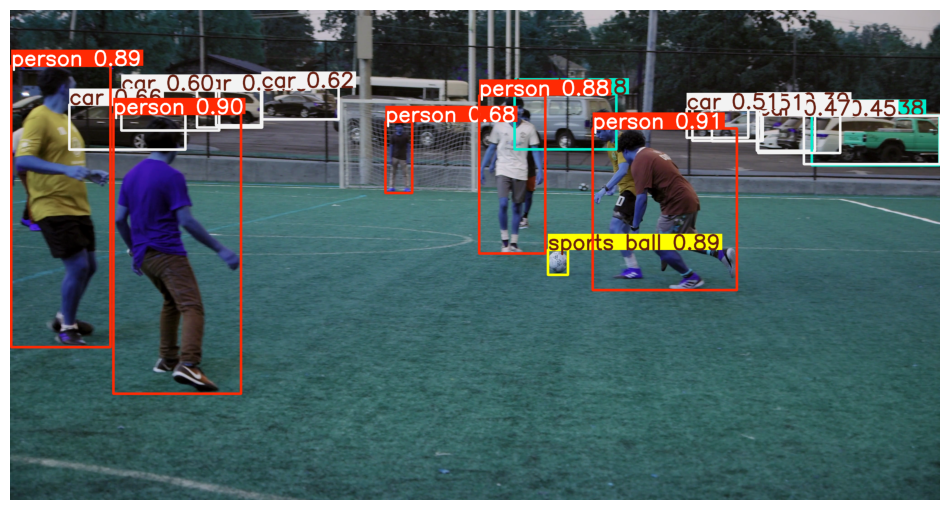

In [7]:
import matplotlib.pyplot as plt

annotated = r.plot()  # numpy image with boxes drawn
plt.figure(figsize=(12, 7))
plt.imshow(annotated)
plt.axis("off")
plt.show()


In [8]:
CONF_TH = 0.35
keep = {"person", "sports ball"}

filtered2 = []
for b in boxes:
    cls_id = int(b.cls[0])
    cls_name = names[cls_id]
    conf = float(b.conf[0])
    if cls_name in keep and conf >= CONF_TH:
        x1, y1, x2, y2 = map(float, b.xyxy[0])
        filtered2.append((cls_name, conf, (x1, y1, x2, y2)))

print(f"Filtered (conf >= {CONF_TH}) detections: {len(filtered2)}")
for cls_name, conf, (x1, y1, x2, y2) in filtered2:
    print(cls_name, round(conf, 3), (round(x1,1), round(y1,1), round(x2,1), round(y2,1)))


Filtered (conf >= 0.35) detections: 6
person 0.907 (2566.2, 525.6, 3201.7, 1236.7)
person 0.903 (455.8, 462.0, 1017.6, 1692.1)
sports ball 0.893 (2369.7, 1059.7, 2457.9, 1169.7)
person 0.886 (5.1, 249.3, 442.9, 1487.6)
person 0.878 (2067.0, 380.7, 2357.3, 1075.9)
person 0.681 (1653.5, 496.1, 1771.9, 809.1)


In [9]:
import cv2
from pathlib import Path

out_path = Path("../outputs") / "yolo_single_frame_annotated.png"
out_path.parent.mkdir(parents=True, exist_ok=True)

# matplotlib uses RGB; OpenCV expects BGR if writing
annotated_bgr = cv2.cvtColor(annotated, cv2.COLOR_RGB2BGR)
cv2.imwrite(str(out_path), annotated_bgr)

print("Saved:", out_path)


Saved: ../outputs/yolo_single_frame_annotated.png
